# Analisis Exploratorio

In [42]:
import cv2
import os
import numpy as np
import albumentations as A

import matplotlib.pyplot as plt
from collections import defaultdict

## Promedio de la resolucion de mis imagenes

In [43]:
# Ruta relativa a la carpeta de imágenes
carpeta_imagenes = '/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG'

ancho_total = 0
alto_total = 0
num_imagenes = 0

for archivo in os.listdir(carpeta_imagenes):
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        ruta_imagen = os.path.join(carpeta_imagenes, archivo)
        img = cv2.imread(ruta_imagen)
        if img is not None:
            alto, ancho = img.shape[:2]
            ancho_total += ancho
            alto_total += alto
            num_imagenes += 1

if num_imagenes > 0:
    promedio_ancho = ancho_total / num_imagenes
    promedio_alto = alto_total / num_imagenes
    print(f"Promedio de resolución: {promedio_ancho:.2f} x {promedio_alto:.2f}")
else:
    print("No se encontraron imágenes.")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Promedio de resolución: 1101.60 x 1023.07


## Reducción de resolucion a 640×640, debido a que es la recomendada por YOLOv5

In [44]:
# Ruta a la carpeta de imágenes originales (relativa o absoluta)
carpeta_entrada = '/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG'
# Ruta a la carpeta de salida redimensionadas (puede ser igual a la anterior si deseas sobrescribir)
carpeta_salida = '/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas'

# Crear carpeta de salida si no existe
os.makedirs(carpeta_salida, exist_ok=True)

# Dimensiones deseadas
nuevo_ancho = 640
nuevo_alto = 640

for archivo in os.listdir(carpeta_entrada):
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        ruta_entrada = os.path.join(carpeta_entrada, archivo)
        ruta_salida = os.path.join(carpeta_salida, archivo)

        # Leer la imagen
        img = cv2.imread(ruta_entrada)
        if img is not None:
            # Redimensionar a 640x640
            img_redimensionada = cv2.resize(img, (nuevo_ancho, nuevo_alto), interpolation=cv2.INTER_AREA)
            # Guardar la imagen redimensionada
            cv2.imwrite(ruta_salida, img_redimensionada)
            print(f"Redimensionada: {archivo}")
        else:
            print(f"No se pudo leer: {archivo}")

Redimensionada: Diclofenaco_MK (otra copia).png
Redimensionada: Diclofenaco_OPHARMA (copia).png
Redimensionada: Diclofenaco_OPHARMA.png
Redimensionada: Diclofenaco_MK (copia).png
Redimensionada: Diclofenaco_Portugal (otra copia).png
Redimensionada: Diclofenaco_Portugal.png
Redimensionada: Diclofenaco_OPHARMA (otra copia).png
Redimensionada: Ibuprofeno-Lacofa (copia).png
Redimensionada: Diclofenaco_Portugal (copia).png
Redimensionada: IBUPROFENO-LaSante (copia).png
Redimensionada: Ibuprofeno_MK (otra copia).png
Redimensionada: Ibuprofeno_MK (copia).png
Redimensionada: Ibuprofeno_MK.png
Redimensionada: IBUPROFENO-LaSante (otra copia).png
Redimensionada: Ibuprofeno-Lacofa.png
Redimensionada: IBUPROFENO-LaSante.png
Redimensionada: acetaminofen500mg_Genfar_LOTE.png
Redimensionada: acetaminofen500mg_Genfar_LOTE (Copiar).png
Redimensionada: acetaminofen500mg_Genfar_LOTE (Copiar 2).png
Redimensionada: Acetaminofen500mg_BPM_LOTE.png
Redimensionada: Acetaminofen500mg_BPM_LOTE (Copiar).png
Redime

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Redimensionada: Amoxicilina500mg_AG_LOTE.png
Redimensionada: Amoxicilina500mg_AG_LOTE (Copiar).png


libpng warning: iCCP: known incorrect sRGB profile


Redimensionada: Amoxicilina500mg_AG_LOTE (Copiar 2).png
Redimensionada: AmoxicilinaPolvo250mg_mk_LOTE.png
Redimensionada: AmoxicilinaPolvo250mg_mk_LOTE (Copiar).png
Redimensionada: AmoxicilinaPolvo250mg_mk_LOTE (Copiar 2).png
Redimensionada: AMOXICILINAPolvo250MG_LaSante_LOTE.png
Redimensionada: AMOXICILINAPolvo250MG_LaSante_LOTE (Copiar).png
Redimensionada: AMOXICILINAPolvo250MG_LaSante_LOTE (Copiar 2).png
Redimensionada: DiclofenacoViaOral50mg_Genfar_LOTE.png
Redimensionada: DiclofenacoViaOral50mg_Genfar_LOTE (Copiar).png
Redimensionada: DiclofenacoViaOral50mg_Genfar_LOTE (Copiar 2).png
Redimensionada: Ibuprofeno100mg_Chile_LOTE.png
Redimensionada: Ibuprofeno100mg_Chile_LOTE (Copiar).png
Redimensionada: Ibuprofeno100mg_Chile_LOTE (Copiar 2).png
Redimensionada: AmoxicilinaCapsula500mg_AG_LOTE.png
Redimensionada: AmoxicilinaCapsula500mg_AG_LOTE (Copiar).png
Redimensionada: AmoxicilinaCapsula500mg_AG_LOTE (Copiar 2).png
Redimensionada: DiclofenacoTableta50mg_MK_LOTE.png
Redimensionada: 

#### En caso de ser llevado a produccion se debe de crear un metodo que actualice las dimensiones de la ultima imagen agregada al dataset

In [45]:
#img_prueba = cv2.imread('/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas/acetaminofen500mg_Genfar_LOTE.png')
#img_prueba.shape

## Tengo muy pocas imagenes...El modelo YOLO necesita como minimo 1500 por clase...que Hago ?!!

In [46]:
carpeta_images = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas'
carpeta_labels = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/labels_medicamentos'
salida_images = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas_imagenes_aumentadas'
salida_labels = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/labels_medicamentos_imagenes_aumentadas'

In [47]:
# Crear carpetas de salida si no existen
os.makedirs(salida_images, exist_ok=True)
os.makedirs(salida_labels, exist_ok=True)

# Transformaciones de augmentación
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.4),
    A.Rotate(limit=15, p=0.5),
    A.Blur(blur_limit=3, p=0.3),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels'], min_visibility=0.3))

# Cuántas veces quieres aumentar cada imagen
aumentos_por_imagen = 5

# Procesar cada imagen
for nombre_imagen in os.listdir(carpeta_images):
    if not nombre_imagen.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    ruta_imagen = os.path.join(carpeta_images, nombre_imagen)
    ruta_label = os.path.join(carpeta_labels, nombre_imagen.rsplit('.', 1)[0] + '.txt')

    # Leer imagen
    img = cv2.imread(ruta_imagen)
    height, width = img.shape[:2]

    # Leer etiquetas YOLO
    if not os.path.exists(ruta_label):
        print(f"Etiqueta no encontrada: {ruta_label}")
        continue

    with open(ruta_label, 'r') as f:
        lines = f.read().strip().splitlines()

    bboxes = []
    class_labels = []

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        class_id = int(parts[0])
        bbox = list(map(float, parts[1:]))
        bboxes.append(bbox)
        class_labels.append(class_id)

    # Aplicar augmentaciones múltiples veces
    for i in range(aumentos_por_imagen):
        augmented = transform(image=img, bboxes=bboxes, class_labels=class_labels)
        img_aug = augmented['image']
        bboxes_aug = augmented['bboxes']
        labels_aug = augmented['class_labels']

        # Guardar imagen
        nombre_salida = nombre_imagen.rsplit('.', 1)[0] + f'_aug{i}.jpg'
        cv2.imwrite(os.path.join(salida_images, nombre_salida), img_aug)

        # Guardar etiqueta
        ruta_label_salida = os.path.join(salida_labels, nombre_salida.rsplit('.', 1)[0] + '.txt')
        with open(ruta_label_salida, 'w') as f:
            for label, bbox in zip(labels_aug, bboxes_aug):
                bbox_str = ' '.join([str(round(x, 6)) for x in bbox])
                f.write(f"{label} {bbox_str}\n")

        print(f"Aumentada: {nombre_salida}")


Aumentada: Diclofenaco_MK (otra copia)_aug0.jpg
Aumentada: Diclofenaco_MK (otra copia)_aug1.jpg
Aumentada: Diclofenaco_MK (otra copia)_aug2.jpg
Aumentada: Diclofenaco_MK (otra copia)_aug3.jpg
Aumentada: Diclofenaco_MK (otra copia)_aug4.jpg
Aumentada: Diclofenaco_OPHARMA (copia)_aug0.jpg
Aumentada: Diclofenaco_OPHARMA (copia)_aug1.jpg
Aumentada: Diclofenaco_OPHARMA (copia)_aug2.jpg
Aumentada: Diclofenaco_OPHARMA (copia)_aug3.jpg
Aumentada: Diclofenaco_OPHARMA (copia)_aug4.jpg
Aumentada: Diclofenaco_OPHARMA_aug0.jpg
Aumentada: Diclofenaco_OPHARMA_aug1.jpg
Aumentada: Diclofenaco_OPHARMA_aug2.jpg
Aumentada: Diclofenaco_OPHARMA_aug3.jpg
Aumentada: Diclofenaco_OPHARMA_aug4.jpg
Aumentada: Diclofenaco_MK (copia)_aug0.jpg
Aumentada: Diclofenaco_MK (copia)_aug1.jpg
Aumentada: Diclofenaco_MK (copia)_aug2.jpg
Aumentada: Diclofenaco_MK (copia)_aug3.jpg
Aumentada: Diclofenaco_MK (copia)_aug4.jpg
Aumentada: Diclofenaco_Portugal (otra copia)_aug0.jpg
Aumentada: Diclofenaco_Portugal (otra copia)_aug1.j

## Distribucion de tamaños y de clases

### Identificacion de las clases unicas

In [48]:
# Ruta a tus imágenes
ruta_imagenes = '/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas_imagenes_aumentadas'

# Obtener nombre de clase (antes del segundo "_")
nombres_raw = []
for archivo in os.listdir(ruta_imagenes):
    if archivo.endswith(('.jpg', '.png', '.jpeg')):
        partes = archivo.split('_')
        if len(partes) >= 2:
            nombre_clase = f"{partes[0]}_{partes[1]}"
            nombres_raw.append(nombre_clase)

# Eliminar duplicados y ordenar alfabéticamente
nombres_clase_unicos = sorted(set(nombres_raw))

# Crear diccionario: índice numérico -> nombre de clase
nombres_clases = {i: nombre for i, nombre in enumerate(nombres_clase_unicos)}

# Mostrar el resultado
print(nombres_clases)


{0: 'AMOXICILINAPolvo250MG_LaSante', 1: 'Acetaminofen500mg_BPM', 2: 'Acetaminofen500mg_MK', 3: 'AcetaminofenViaOral500mg_Genfar', 4: 'Amoxicilina500mg_AG', 5: 'AmoxicilinaCapsula500mg_AG', 6: 'AmoxicilinaPolvo250mg_mk', 7: 'DiclofenacoTableta50mg_MK', 8: 'DiclofenacoViaOral50mg_Genfar', 9: 'Diclofenaco_MK (copia)', 10: 'Diclofenaco_MK (otra copia)', 11: 'Diclofenaco_OPHARMA', 12: 'Diclofenaco_OPHARMA (copia)', 13: 'Diclofenaco_OPHARMA (otra copia)', 14: 'Diclofenaco_Portugal', 15: 'Diclofenaco_Portugal (copia)', 16: 'Diclofenaco_Portugal (otra copia)', 17: 'IBUPROFENO-LaSante (copia)_aug0.jpg', 18: 'IBUPROFENO-LaSante (copia)_aug1.jpg', 19: 'IBUPROFENO-LaSante (copia)_aug2.jpg', 20: 'IBUPROFENO-LaSante (copia)_aug3.jpg', 21: 'IBUPROFENO-LaSante (copia)_aug4.jpg', 22: 'IBUPROFENO-LaSante (otra copia)_aug0.jpg', 23: 'IBUPROFENO-LaSante (otra copia)_aug1.jpg', 24: 'IBUPROFENO-LaSante (otra copia)_aug2.jpg', 25: 'IBUPROFENO-LaSante (otra copia)_aug3.jpg', 26: 'IBUPROFENO-LaSante (otra copi

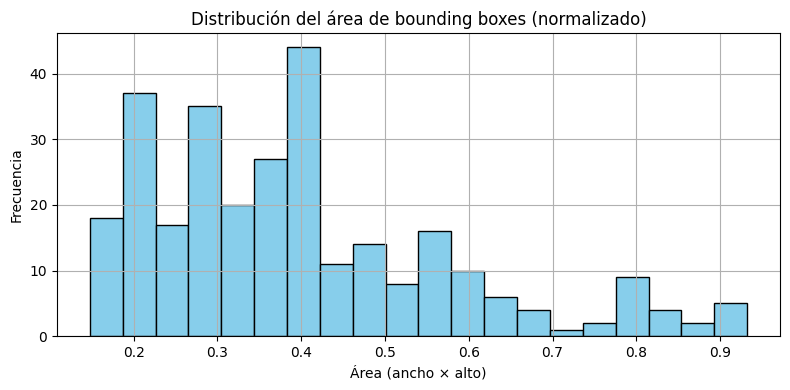

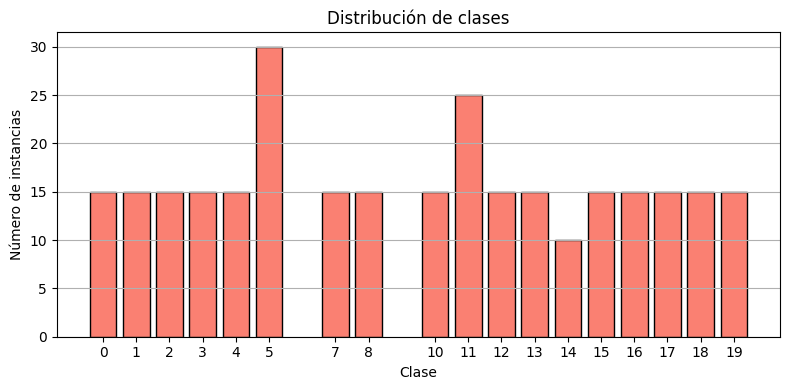

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Rutas
labels = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/labels_medicamentos_imagenes_aumentadas'
imagenes = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas_imagenes_aumentadas'

# Almacenar estadísticas
tamaños = []
conteo_clases = defaultdict(int)

# Leer todas las etiquetas
for archivo in os.listdir(labels):
    if not archivo.endswith('.txt'):
        continue
    ruta_archivo = os.path.join(labels, archivo)

    with open(ruta_archivo, 'r') as f:
        lineas = f.read().strip().splitlines()

    for linea in lineas:
        partes = linea.strip().split()
        if len(partes) != 5:
            print(f"[!] Línea ignorada por formato inválido en {archivo}: {linea}")
            continue
        try:
            clase = int(float(partes[0]))  # Corrige '11.0' a 11
            ancho = float(partes[3])
            alto = float(partes[4])
        except ValueError:
            print(f"[!] Error al procesar línea en {archivo}: {linea}")
            continue

        area = ancho * alto
        tamaños.append(area)
        conteo_clases[clase] += 1


# Histograma de tamaños de bounding boxes
plt.figure(figsize=(8, 4))
plt.hist(tamaños, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del área de bounding boxes (normalizado)')
plt.xlabel('Área (ancho × alto)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conteo de clases
clases = list(conteo_clases.keys())
frecuencias = [conteo_clases[c] for c in clases]

plt.figure(figsize=(8, 4))
plt.bar(clases, frecuencias, color='salmon', edgecolor='black')
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.xticks(clases)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


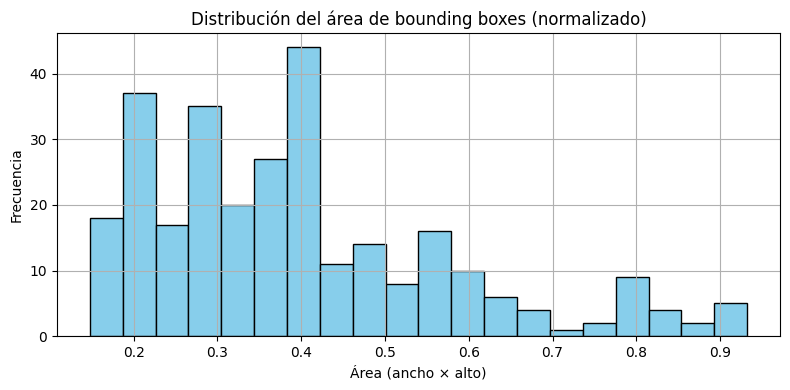

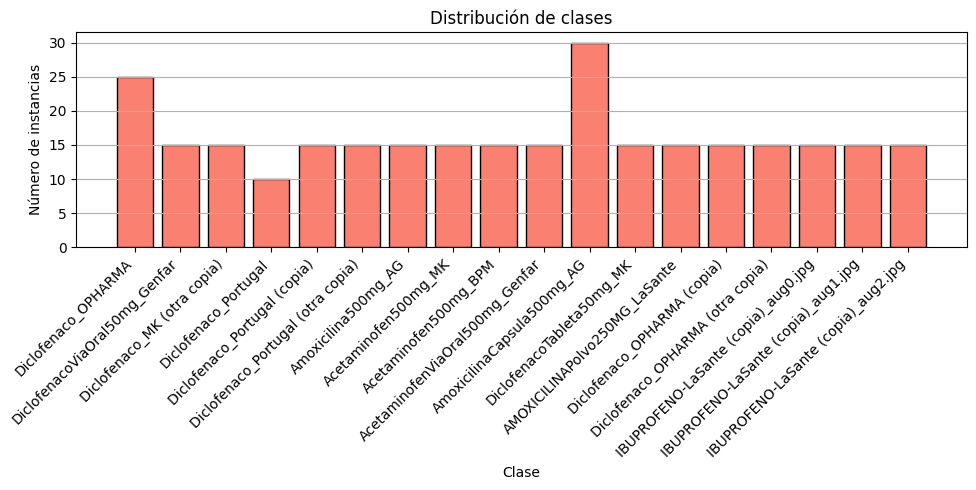

In [ ]:
# Rutas
labels = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/labels_medicamentos_imagenes_aumentadas'
imagenes = r'/home/SantiagoInge/Estudios/Especializacion/Monografia/MonografiaMedicamentos/BasesDeDatos/imagenes_transformadasPNG_redimensionadas_imagenes_aumentadas'

#Extraer nombres de clases desde los nombres de imagen
nombres_raw = []
for archivo in os.listdir(imagenes):
    if archivo.endswith(('.jpg', '.png', '.jpeg')):
        partes = archivo.split('_')
        if len(partes) >= 2:
            nombre_clase = f"{partes[0]}_{partes[1]}"
            nombres_raw.append(nombre_clase)

# Eliminar duplicados y ordenar
nombres_clase_unicos = sorted(set(nombres_raw))
nombres_clases = {i: nombre for i, nombre in enumerate(nombres_clase_unicos)}

# Invertir el diccionario para mapear nombres a índices, útil si quieres validar consistencia
nombre_a_id = {v: k for k, v in nombres_clases.items()}

# Análisis de bounding boxes y conteo de clases
tamaños = []
conteo_clases = defaultdict(int)

# Leer archivos de etiquetas
for archivo in os.listdir(labels):
    if not archivo.endswith('.txt'):
        continue
    ruta_archivo = os.path.join(labels, archivo)

    with open(ruta_archivo, 'r') as f:
        lineas = f.read().strip().splitlines()

    for linea in lineas:
        partes = linea.strip().split()
        if len(partes) != 5:
            print(f"[!] Línea ignorada por formato inválido en {archivo}: {linea}")
            continue
        try:
            clase = int(float(partes[0]))  # Corrige valores tipo "11.0"
            ancho = float(partes[3])
            alto = float(partes[4])
        except ValueError:
            print(f"[!] Error al procesar línea en {archivo}: {linea}")
            continue

        area = ancho * alto
        tamaños.append(area)
        conteo_clases[clase] += 1

# Histograma de tamaños de bounding boxes

plt.figure(figsize=(8, 4))
plt.hist(tamaños, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del área de bounding boxes (normalizado)')
plt.xlabel('Área (ancho × alto)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

#Conteo de clases (usando nombres)
clases = list(conteo_clases.keys())
frecuencias = [conteo_clases[c] for c in clases]
nombres = [nombres_clases.get(c, f"Clase {c}") for c in clases]

plt.figure(figsize=(10, 5))
plt.bar(nombres, frecuencias, color='salmon', edgecolor='black')
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Número de instancias')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Balnceando las clases